<a href="https://colab.research.google.com/github/BHRA2004/Stock_Price_Prediction_Analysis/blob/main/Stock_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Data**

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532074,187.315366,182.792518,186.033057,82488700
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500
2024-01-04,180.824341,181.997291,179.800489,181.062899,71983600
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500
2024-01-09,184.035065,184.045000,181.639444,182.822345,42841800
2024-01-10,185.078796,185.287535,182.822340,183.249781,46792900
2024-01-11,184.482376,185.933669,182.524132,185.426703,49128400


In [65]:
stock_data.dropna().sum()

,,0
Price,Ticker,
Close,AAPL,0.0
High,AAPL,0.0
Low,AAPL,0.0
Open,AAPL,0.0
Volume,AAPL,0.0
TSLA_Close,,0.0
APPL_Close,,0.0
SMA,,0.0
WMA,,0.0


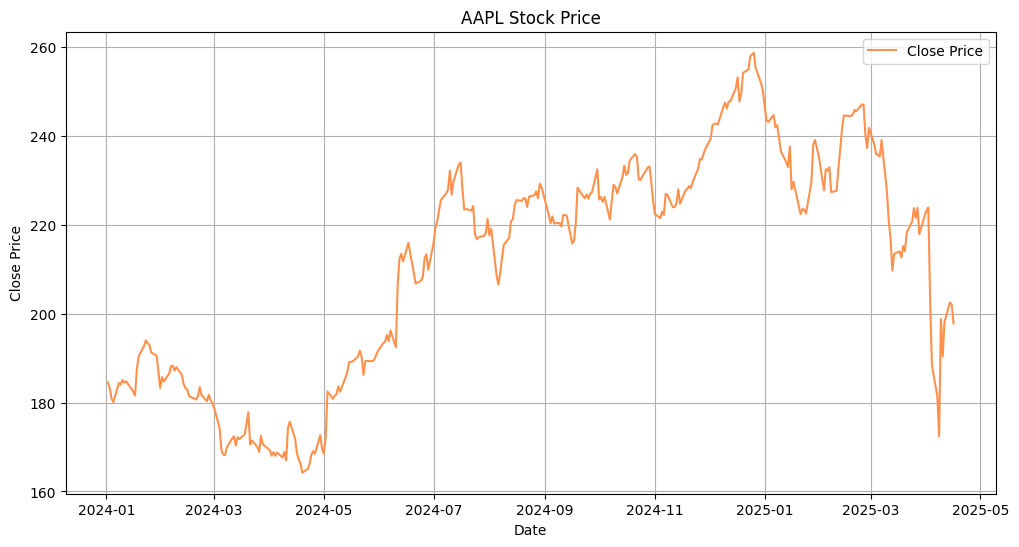

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label ='Close Price', color = '#FF914D')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

**Classical Time Series Decomposition**

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period = 30)

In [4]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

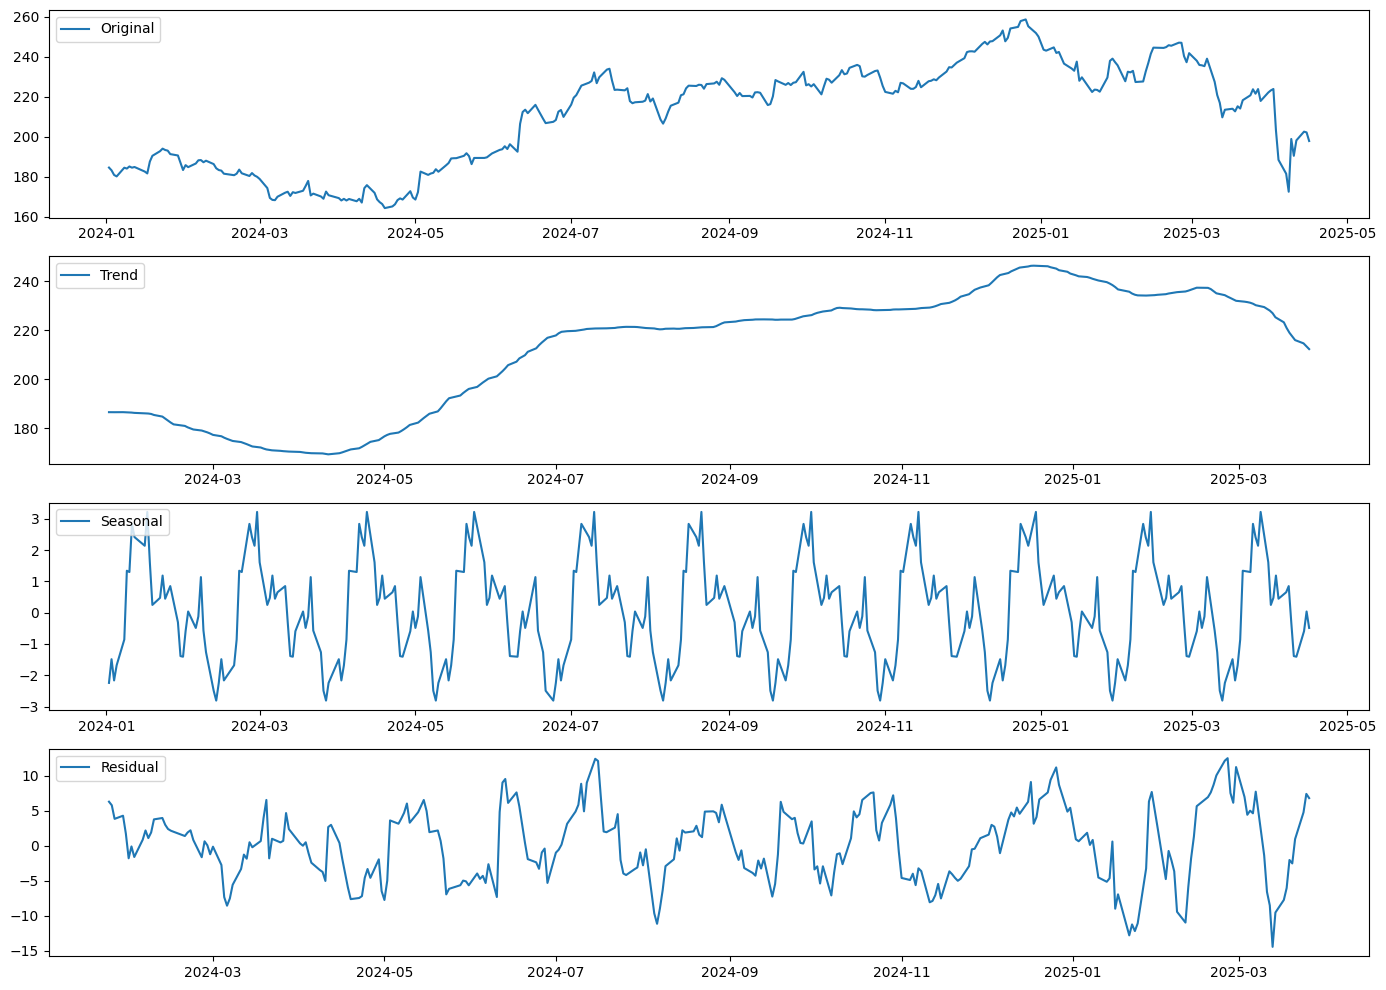

In [5]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label = 'Original')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(trend_additive, label = 'Trend')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label = 'Seasonal')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label = 'Residual')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**STL Decomposition**

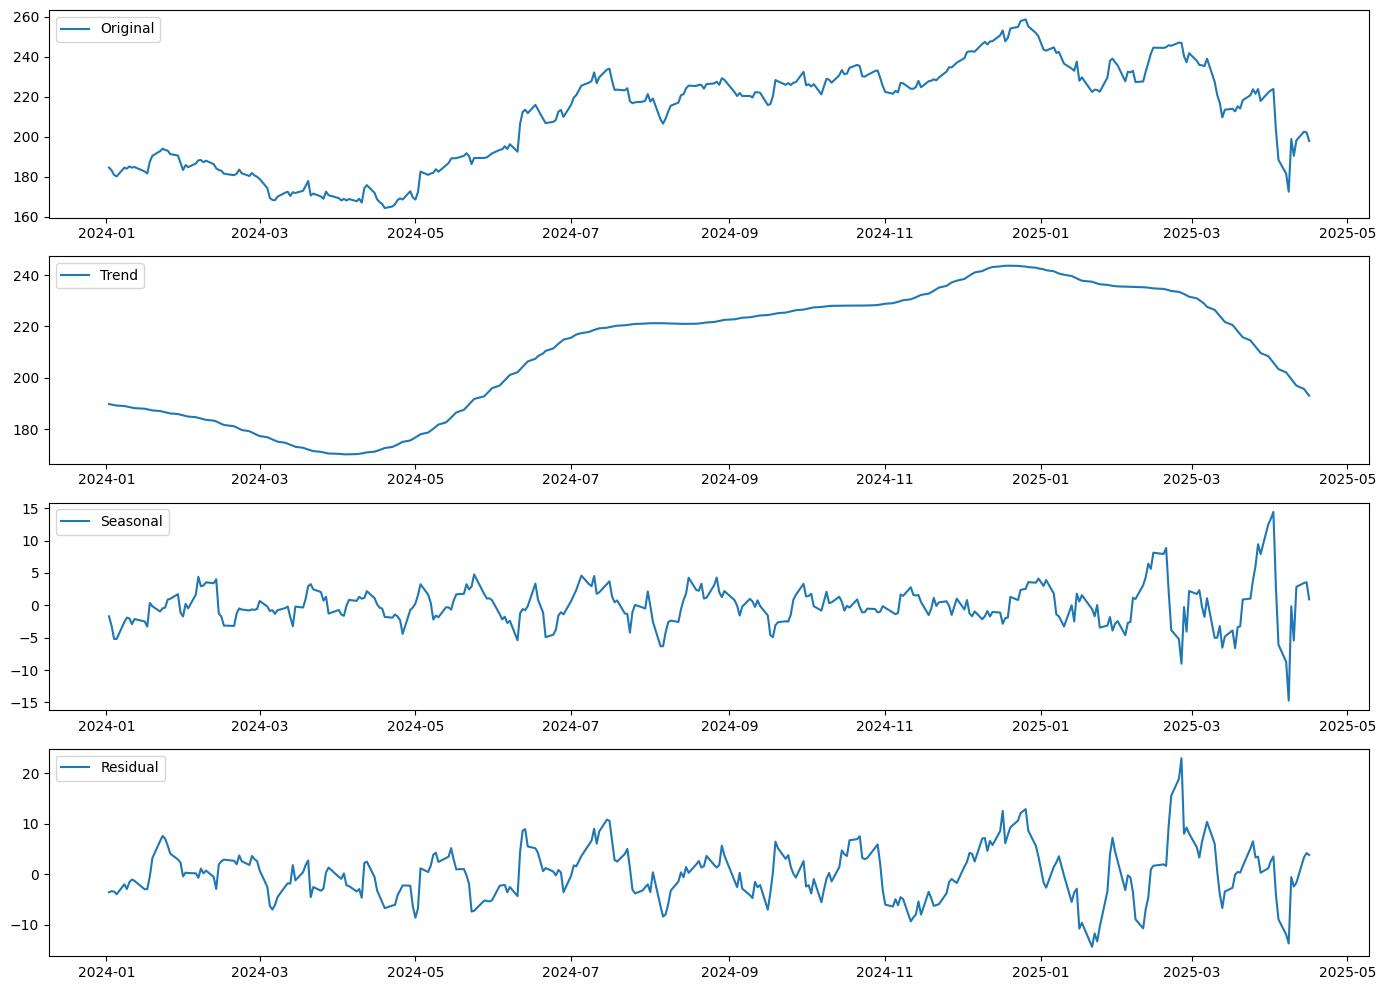

In [6]:
from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'], period = 30)
res = stl.fit()

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label = 'Original')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(res.trend, label = 'Trend')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(res.seasonal, label = 'Seasonal')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(res.resid, label = 'Residual')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Stationary Test**

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'])
print(f'ADF Statistic: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
  print(f'   {key}: {round(value, 3)}')

ADF Statistic: -1.519
p-value: 0.524
Critical Values:
   1%: -3.451
   5%: -2.871
   10%: -2.572


In [8]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant (level stationary), 'ct' for trend
print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0], 2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
  print(f'   {key}: {value}')


KPSS Test Results:
KPSS Statistic: 0.35
p-value: 0.01
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


<ipython-input-8-e454d242c904>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant (level stationary), 'ct' for trend


**Making Data Stationary**

In [9]:
def adf_test(timeseries):
  adf_result = adfuller(timeseries)
  print(f'ADF Statistic: {round(adf_result[0], 3)}')
  print(f'p-value: {round(adf_result[1], 3)}')
  print('Critical Values:')
  for key, value in adf_result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

def kpss_test(timeseries):
  kpss_result = kpss(timeseries, regression = 'c')
  print('KPSS Test Results:')
  print(f'KPSS Statistic: {round(kpss_result[0], 2)}')
  print(f'p-value: {kpss_result[1]}')
  print('Critical Values:')
  for key, value in kpss_result[3].items():
    print('Critical Value (%s): %.3f' % (key, value))


In [10]:
prices = stock_data['Close']

In [11]:
adf_test(prices)

ADF Statistic: -1.519
p-value: 0.524
Critical Values:
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


In [12]:
prices

Ticker,AAPL
Date,
2024-01-02,184.532074
2024-01-03,183.150391
2024-01-04,180.824341
2024-01-05,180.098694
2024-01-08,184.452560
...,...
2025-04-10,190.419998
2025-04-11,198.149994
2025-04-14,202.520004


In [13]:
prices_diff = prices.diff()

In [14]:
adf_test(prices_diff.dropna())

ADF Statistic: -10.536
p-value: 0.0
Critical Values:
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


In [16]:
prices.diff().diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.944366
2024-01-05,1.600403
2024-01-08,5.079514
...,...
2025-04-10,-34.860016
2025-04-11,16.160004
2025-04-14,-3.359985


In [17]:
import numpy as np
from scipy import stats

#Log transformation
prices_log = np.log(prices)

#Square root transformation
prices_sqrt = np.sqrt(prices)

In [18]:
adf_test(prices_log)

ADF Statistic: -1.521
p-value: 0.523
Critical Values:
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


In [19]:
adf_test(prices_sqrt)

ADF Statistic: -1.519
p-value: 0.524
Critical Values:
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


In [20]:
from scipy import signal
import pandas as pd
import numpy as np

# Using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))

# Convert trendline to a pandas Series with the same index as 'prices'
trendline = pd.Series(trendline, index=prices.index)

# Now, the subtraction should work correctly
# prices_detrended = prices.to_numpy() - trendline.to_numpy() # original line
prices_detrended = (prices - trendline).squeeze() # modified to avoid added dimensions

In [21]:
adf_test(prices_detrended)

ValueError: x is required to have ndim 1 but has ndim 2

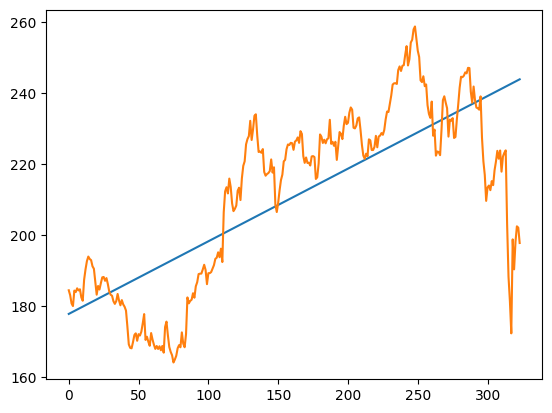

In [22]:
plt.plot(np.arange(len(prices)),trendline)
plt.plot(np.arange(len(prices)),prices)
plt.show()

In [23]:
window = 12
prices_ma = prices.rolling(window = window).mean()
prices_detrended_ma = prices - prices_ma
prices_detrended = prices_detrended_ma.dropna()

In [24]:
adf_test(prices_detrended)

ADF Statistic: -5.909
p-value: 0.0
Critical Values:
Critical Value (1%): -3.452
Critical Value (5%): -2.871
Critical Value (10%): -2.572


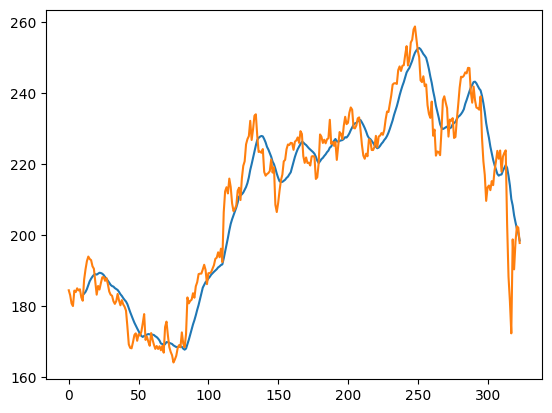

In [25]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Decomposition
decomposition_additive = seasonal_decompose(prices, model='additive', period=30)

# Adjust prices by removing seasonality
prices_adjusted = prices / decomposition_additive.seasonal

# Ensure it's a 1D Series and drop NaN values
prices_adjusted = prices_adjusted.dropna()

# Perform ADF test
result = adfuller(prices_adjusted)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ValueError: x is required to have ndim 1 but has ndim 2

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Assume 'prices' is a DataFrame, select the relevant column
prices = stock_data['Close']  # Replace with actual column name if needed

# Decompose the time series
decomposition_additive = seasonal_decompose(prices, model='additive', period=30)

# Adjust prices by removing seasonality
prices_adjusted = prices / decomposition_additive.seasonal

# Convert to 1D Series
if isinstance(prices_adjusted, pd.DataFrame):
    prices_adjusted = prices_adjusted.iloc[:, 0]  # Select first column if DataFrame

# Drop NaN values
prices_adjusted = prices_adjusted.dropna()

# Perform ADF test
result = adfuller(prices_adjusted)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ValueError: zero-size array to reduction operation maximum which has no identity

In [28]:
adf_test(prices_adjusted)

ValueError: zero-size array to reduction operation maximum which has no identity

In [29]:
# prompt: ljungbox test on the prices_diff

from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on the differenced prices
lb_test = acorr_ljungbox(prices, lags=[10], return_df=True) # Check for autocorrelation up to lag 10
lb_test


,lb_stat,lb_pvalue
10,2831.852797,0.0


The p value of ljungbox text is less than 0.05, so the time series is random walk. There is autocorrlation.
This is why the 1st diff of this data is stationary.

**Time Series Forcasting Models**

**AR Model**

In [31]:
stock_data = yf.download("AAPL", start = "2024-01-01")

apple_price_stationary = stock_data['Close'].diff().dropna()

train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {round(adf_result[0], 3)}')
    print(f'p-value: {round(adf_result[1], 3)}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

adf_test(apple_price_stationary)

ADF Statistic: -10.541
p-value: 0.0
Critical Values:
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


In [33]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    kpss_result = kpss(timeseries, regression='c')
    print('KPSS Test Results:')
    print(f'KPSS Statistic: {round(kpss_result[0], 2)}')
    print(f'p-value: {kpss_result[1]}')
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

kpss_test(apple_price_stationary)

KPSS Test Results:
KPSS Statistic: 0.17
p-value: 0.1
Critical Values:
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


<ipython-input-33-8a359831913e>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(timeseries, regression='c')


In [34]:
len(train_data)

293

In [35]:
len(train_data) + len(test_data) - 1

322

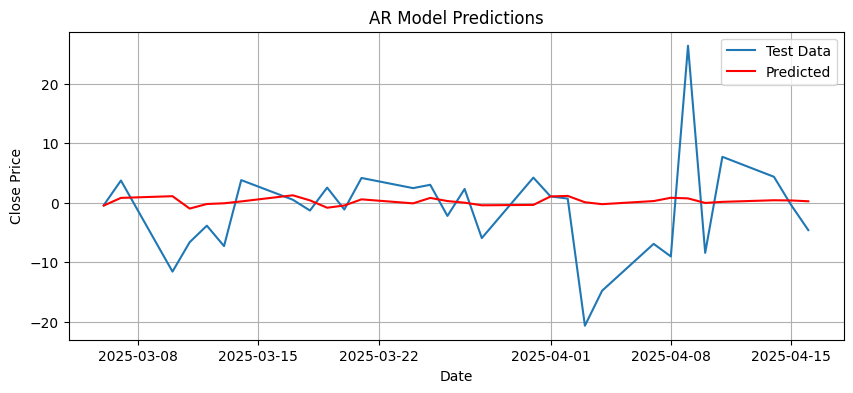

RMSE: 8.17


In [36]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 4))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, color = 'red', label = 'Predicted')
plt.title('AR Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

**MA Model**

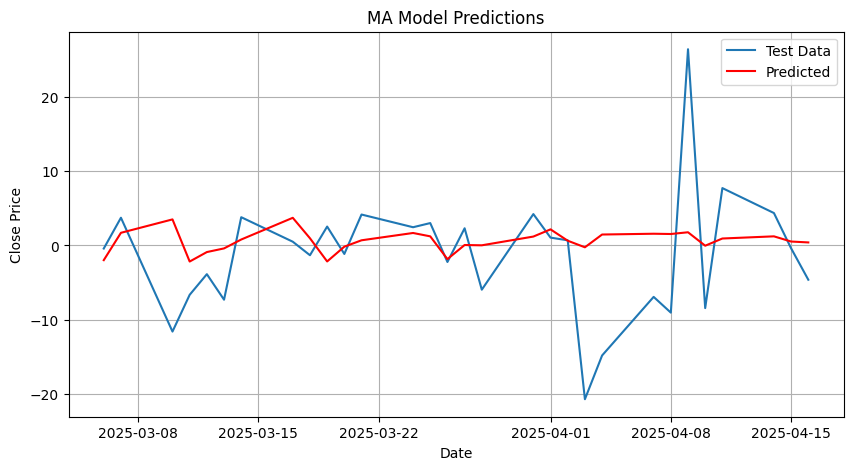

RMSE: 8.28


In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order = (0, 0, 30))
model_fit = model.fit()

predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, color = 'red', label = 'Predicted')
plt.title('MA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

**ARMA Model**

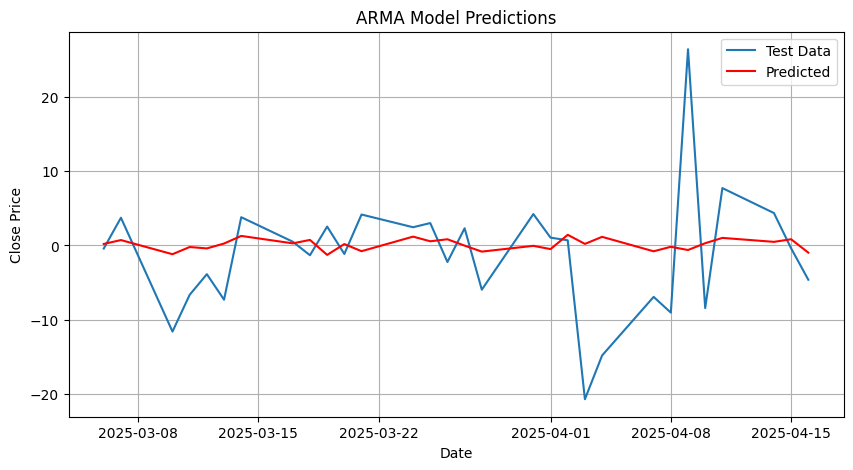

RMSE: 8.25


In [38]:
model = ARIMA(train_data, order = (7,0,7))
model_fit = model.fit()

predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, color = 'red', label = 'Predicted')
plt.title('ARMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


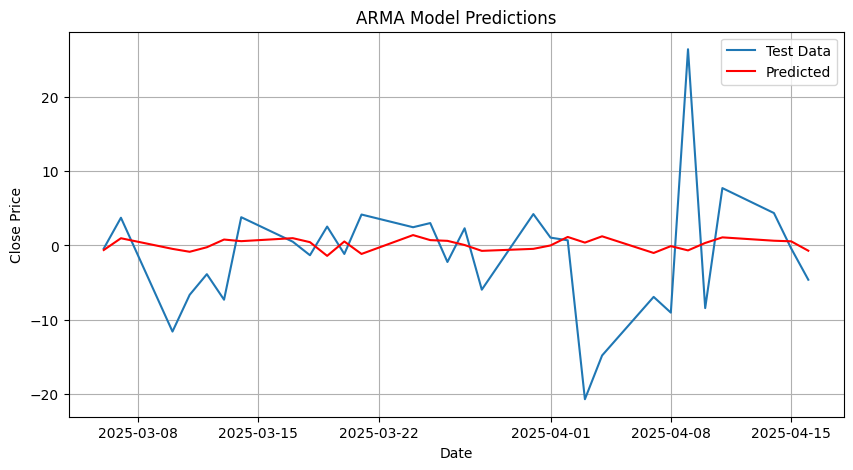

RMSE: 8.32


In [39]:
model = ARIMA(train_data, order = (7,1,7))
model_fit = model.fit()

predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, color = 'red', label = 'Predicted')
plt.title('ARMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

**SARIMA Model**

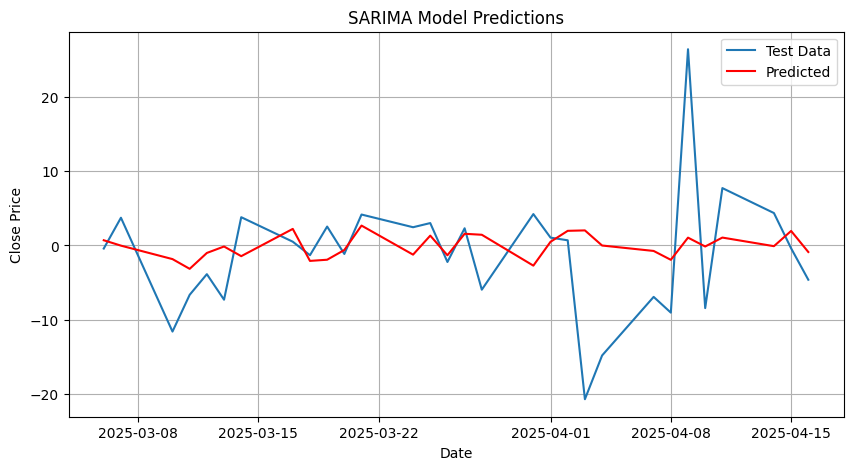

RMSE: 8.12


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data, order = (7, 1, 7), seasonal_order = (1, 1, 1, 45))
model_fit = model.fit()

predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(test_data.index, predictions, color = 'red', label = 'Predicted')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

**Vector Models**

In [41]:
tsla_data = yf.download("TSLA", start = '2024-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

granger_test = grangercausalitytests(stock_data[['TSLA_Close', 'APPL_Close']].dropna(), maxlag = [14])
print()

[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.2486  , p=0.2397  , df_denom=280, df_num=14
ssr based chi2 test:   chi2=19.2914 , p=0.1541  , df=14
likelihood ratio test: chi2=18.7132 , p=0.1762  , df=14
parameter F test:         F=1.2486  , p=0.2397  , df_denom=280, df_num=14



In [42]:
stock_data

Price,Close,High,Low,Open,Volume,TSLA_Close,APPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500,238.449997,184.532074
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600,237.929993,183.150375
2024-01-05,180.098679,181.669251,179.094712,180.903857,62303300,237.490005,180.824356
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500,240.449997,180.098679
2024-01-09,184.035065,184.045000,181.639444,182.822345,42841800,234.960007,184.452560
...,...,...,...,...,...,...,...
2025-04-10,190.419998,194.779999,183.000000,189.070007,121880000,252.399994,198.850006
2025-04-11,198.149994,199.539993,186.059998,186.100006,87435900,252.309998,190.419998


In [43]:
data = stock_data[['APPL_Close', 'TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14],data[-14:]

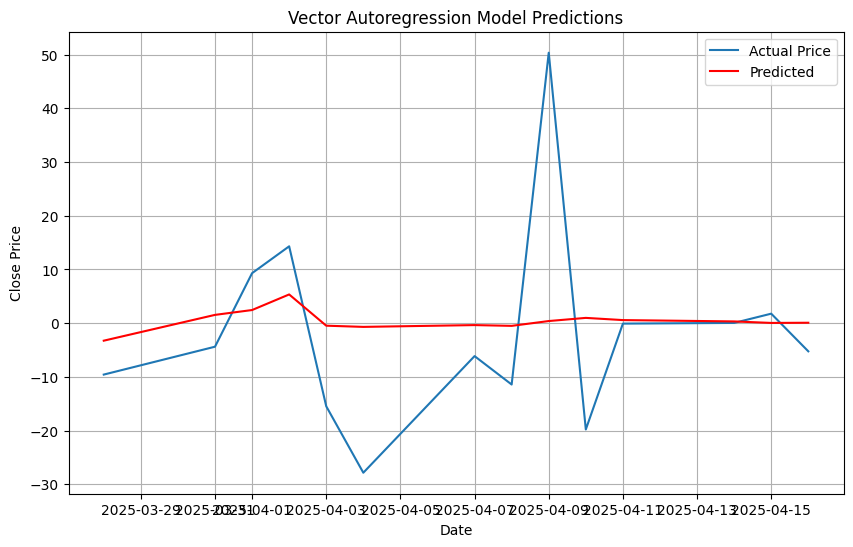

RMSE: 17.48


In [46]:
from statsmodels.tsa.api import VAR, VARMAX

model = VAR(train_data)
result = model.fit(maxlags = 7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps = len(test_data))

predictions = pd.DataFrame(predictions, columns = test_data.columns, index = test_data.index)
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price')
plt.plot(test_data.index, predictions['TSLA_Close'], color = 'red', label = 'Predicted')
plt.title('Vector Autoregression Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE:', rmse)

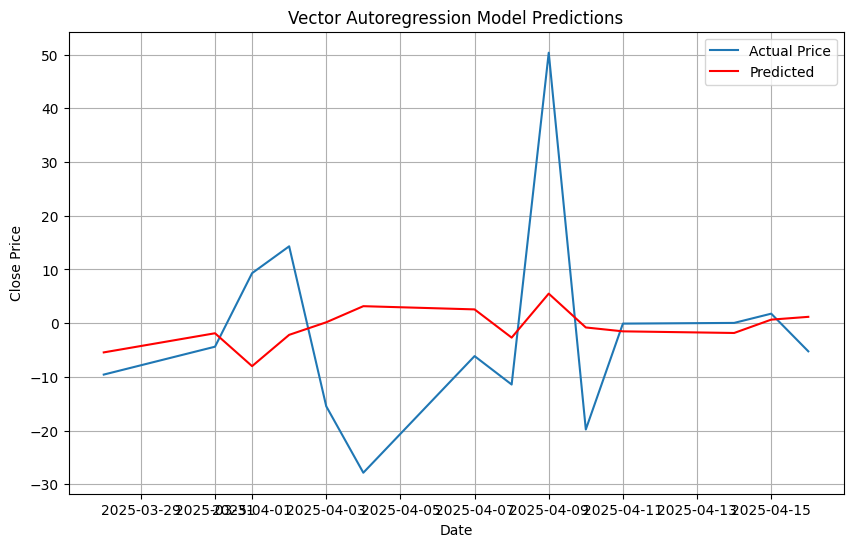

RMSE: 17.67


In [50]:
#VARIMA
model = VARMAX(train_data, order = (14, 14))
result = model.fit()
predictions = result.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price')
plt.plot(test_data.index, predictions['TSLA_Close'], color = 'red', label = 'Predicted')
plt.title('Vector Autoregression Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE:', rmse)

**Smoothing Methods**

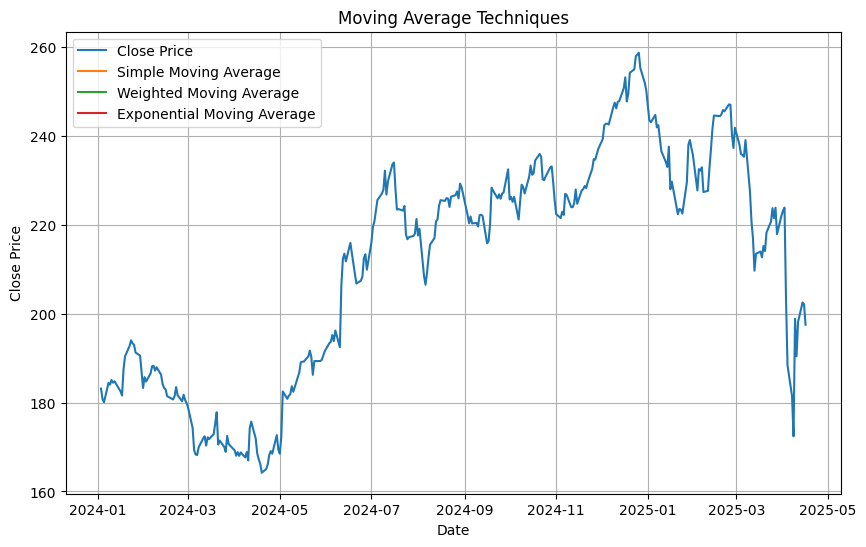

In [58]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window = window_size).mean()

weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw = True)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size, adjust = False).mean()

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label = 'Close Price')
plt.plot(stock_data['SMA'], label = 'Simple Moving Average')
plt.plot(stock_data['WMA'], label = 'Weighted Moving Average')
plt.plot(stock_data['EMA'], label = 'Exponential Moving Average')
plt.title('Moving Average Techniques')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


**ACF & PACF**

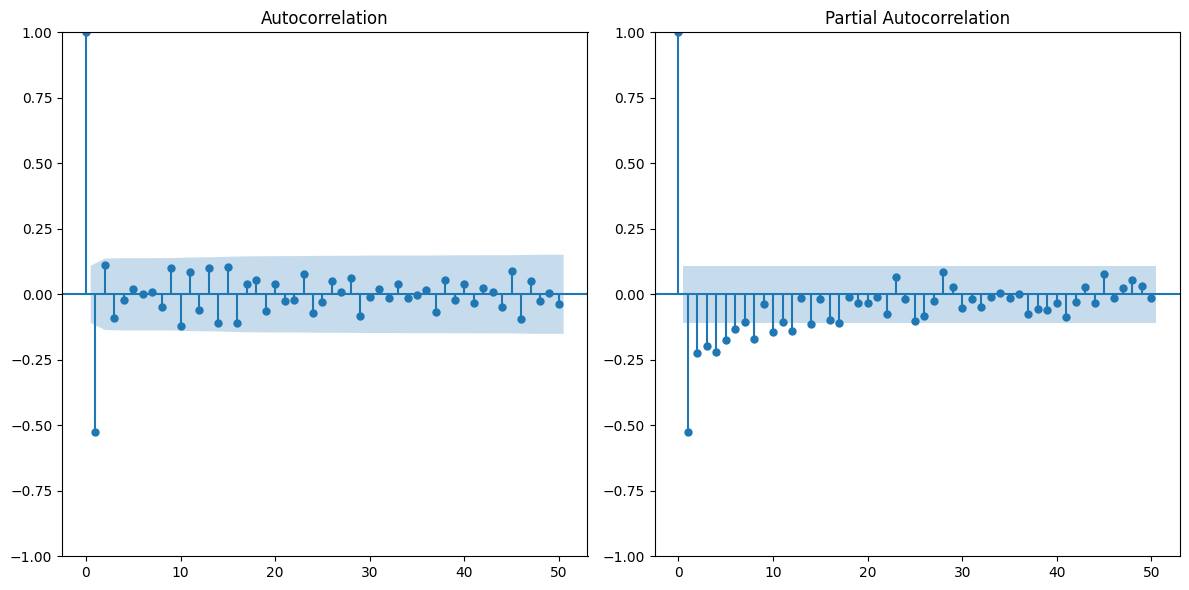

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags = 50)
plt.title('Autocorrelation')

plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags = 50, method ='ywm')
plt.title('Partial Autocorrelation')

plt.tight_layout()
plt.show()

**Model Evaluation Metrics**

In [60]:
 train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

 model = AutoReg(train_data, lags = 30)
 model_fit = model.fit()

 predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
#mape = np.mean(np.abs((list(test_data)- predictions) / list(test_data))) * 100
#print(f'Mean Absolute Percentage Error (MAPE): {mape}')

aic = model_fit.aic
print(f'AIC: {aic}')
bic = model_fit.bic
print(f'BIC: {bic}')

Mean Absolute Error (MAE): 5.657581678595847
Mean Squared Error (MSE): 66.8225033758243
Root Mean Squared Error (RMSE): 8.174503249483989
AIC: 1389.5847289406418
BIC: 1503.8936579703302


In [64]:
 train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

 model = AutoReg(train_data, lags = 20)
 model_fit = model.fit()

 predictions = model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, dynamic = False)

 from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
#mape = np.mean(np.abs((list(test_data)- predictions) / list(test_data))) * 100
#print(f'Mean Absolute Percentage Error (MAPE): {mape}')

aic = model_fit.aic
print(f'AIC: {aic}')
bic = model_fit.bic
print(f'BIC: {bic}')

Mean Absolute Error (MAE): 5.79212360358233
Mean Squared Error (MSE): 68.21479132605793
Root Mean Squared Error (RMSE): 8.259224620147943
AIC: 1419.8276267145588
BIC: 1499.236006208628
